In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head()

df=df.drop(['PassengerId','Name'],axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


VIP's travelling in the spaceship from each planet. Number of VIP's are very less compared to non-VIP travellers. Maximum number of VIP travellers are from EUROPA.

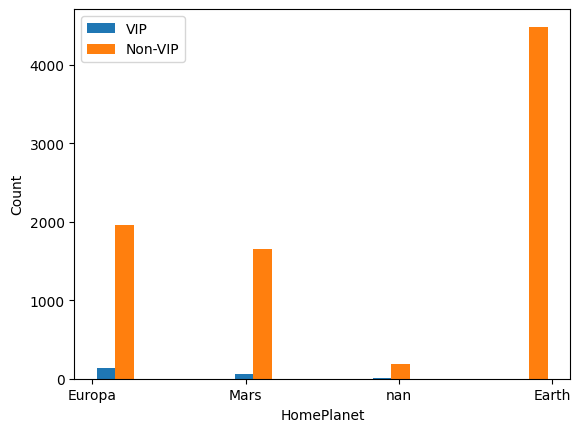

In [11]:
columns_plot=['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']
homeplanet_vip = df[df['VIP'] == 1]['HomePlanet'].astype(str)
homeplanet_non_vip = df[df['VIP'] == 0]['HomePlanet'].astype(str)

plt.hist([homeplanet_vip, homeplanet_non_vip], bins=10, label=['VIP', 'Non-VIP'])
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend()
plt.show()


Destination of the travellers. Many were  travelling to TRAPPIST-1e and passengers that were not transported to TRAPPIST-1e are more than those who were transported.

While those who were travelling to PSO J318.5-22 are equal in transport and not getting transport.

Majority of the pasengers travelling to 55 Cancri e were transported.

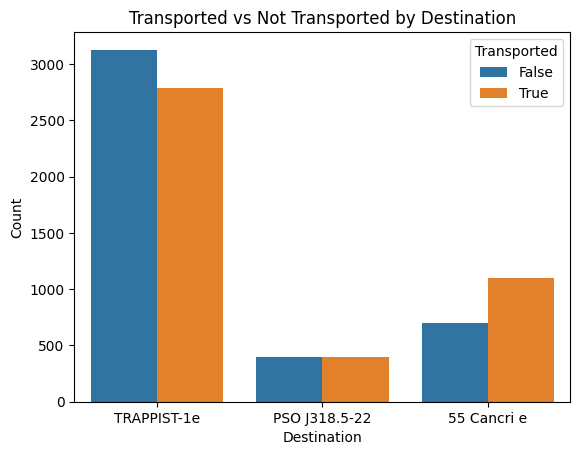

In [12]:
import seaborn as sns
import seaborn as sns

sns.countplot(x='Destination', hue='Transported', data=df)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Transported vs Not Transported by Destination')
plt.show()




Passengers travelling from earth mostly went missing.
Passengers travelling from Mars were almost equally went missing and got transported and the Passengers travelling from Europa mostly got transported.

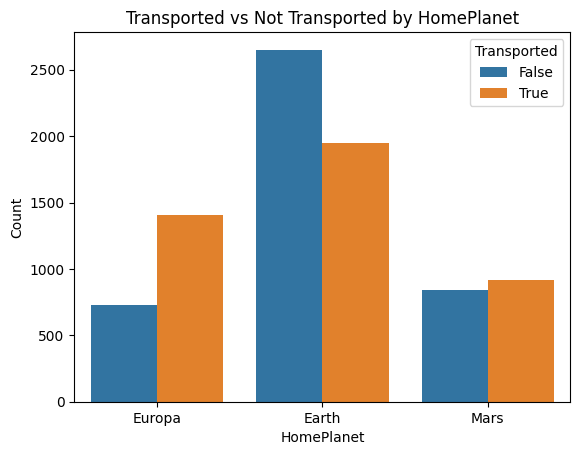

In [13]:
import seaborn as sns

sns.countplot(x='HomePlanet', hue='Transported', data=df)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Transported vs Not Transported by HomePlanet')
plt.show()


Passengers from earth were mostly travelling to TRAPPIST-1e and equally to PSO and 55 Cancri e.

Passengers from Europa were equally travelling to PSO and 55 Cancri e

Passengers from Mars were mostly travelling to TRAPPIST-e


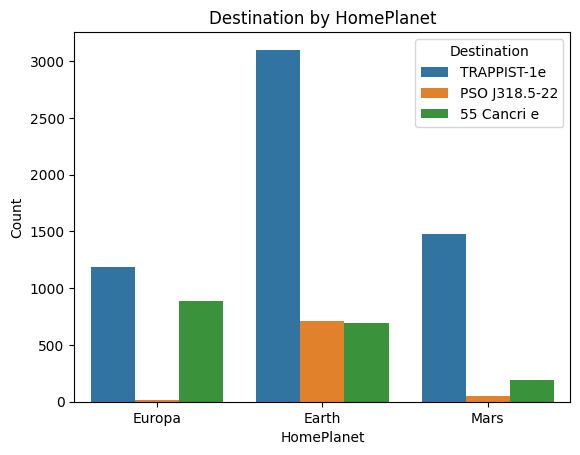

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HomePlanet', hue='Destination', data=df)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Destination by HomePlanet')
plt.show()


Imputing and Encoding categorical columns.

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

label_columns=['HomePlanet','Cabin','Destination']
Imputer_encoded=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Label = LabelEncoder()
df_encoded = pd.concat([df[label_columns].apply(Label.fit_transform), df.drop(label_columns,axis=1)], axis=1)



In [16]:
df_encoded.head()

,HomePlanet,Cabin,Destination,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,149,2,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0,2184,2,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,1,2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,1,2,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0,2186,2,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [17]:
df_one_hot=pd.get_dummies(df_encoded,drop_first=True)
df_one_hot.head()

,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_True,VIP_True
0,1,149,2,39.0,0.0,0.0,0.0,0.0,0.0,False,False,False
1,0,2184,2,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False
2,1,1,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True
3,1,1,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,False
4,0,2186,2,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False


In [18]:
label_columns_not_to_encode=['HomePlanet','Cabin','Destination','Transported']
Imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute = [col for col in df_one_hot.columns if col not in label_columns_not_to_encode]
df_imputed = pd.DataFrame(Imputer.fit_transform(df_one_hot[columns_to_impute]), columns=columns_to_impute)
df_imputed[label_columns_not_to_encode] = df_one_hot[label_columns_not_to_encode]
df_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,VIP_True,HomePlanet,Cabin,Destination,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,149,2,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,0.0,0,2184,2,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,1,1,2,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1,1,2,False
4,16.0,303.0,70.0,151.0,565.0,2.0,0.0,0.0,0,2186,2,True


In [19]:
missing_values_count = df_imputed.isnull().sum().sum()
print("Number of missing values in df_imputed:", df_imputed.isnull().sum().sum())


Number of missing values in df_imputed: 0


Data Cleaning for Test Data

In [20]:
df_test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_test=df_test.drop(['Name','PassengerId'],axis=1)
df_test.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
Imputer_encoded=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Label = LabelEncoder()
df_encoded_test = pd.concat([df_test[label_columns].apply(Label.fit_transform), df_test.drop(label_columns,axis=1)], axis=1)
df_encoded_test.head()

,HomePlanet,Cabin,Destination,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,2784,2,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0,1867,2,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,1,257,0,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,1,259,2,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0,1940,2,False,20.0,False,10.0,0.0,635.0,0.0,0.0


In [22]:
df_one_hot_test=pd.get_dummies(df_encoded_test,drop_first=True)
df_one_hot_test.head()

,HomePlanet,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,VIP_True
0,0,2784,2,27.0,0.0,0.0,0.0,0.0,0.0,True,False
1,0,1867,2,19.0,0.0,9.0,0.0,2823.0,0.0,False,False
2,1,257,0,31.0,0.0,0.0,0.0,0.0,0.0,True,False
3,1,259,2,38.0,0.0,6652.0,0.0,181.0,585.0,False,False
4,0,1940,2,20.0,10.0,0.0,635.0,0.0,0.0,False,False


In [23]:
label_columns_not_to_encode=['HomePlanet','Cabin','Destination']
Imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute = [col for col in df_one_hot_test.columns if col not in label_columns_not_to_encode]
df_imputed_test = pd.DataFrame(Imputer.fit_transform(df_one_hot_test[columns_to_impute]), columns=columns_to_impute)
df_imputed_test[label_columns_not_to_encode] = df_one_hot_test[label_columns_not_to_encode]
df_imputed_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,VIP_True,HomePlanet,Cabin,Destination
0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2784,2
1,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,0,1867,2
2,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,257,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,1,259,2
4,20.0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,0,1940,2


In [24]:
missing_values_count = df_imputed_test.isnull().sum().sum()
print("Number of missing values in df_imputed:", df_imputed_test.isnull().sum().sum())

Number of missing values in df_imputed: 0


Splitting data set to train and test keeping the test size as low as 20%.

In [25]:
X=df_imputed.loc[:,df_imputed.columns.values!='Transported']
y=df_imputed[['Transported']]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=40)

Fit model method.

In [39]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name,alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    

In [36]:
def pred_model(model, model_name):
    X_test=df_imputed_test
    y_pred=model.predict(X_test)
    print(y_pred)
    df_submission = pd.read_csv(pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv'))
    df_submission['Transported'] = y_pred
    df_submission.to_csv('sample_submission.csv', index=False)
    print("Submission file created.........")

DECISION TREE

Decision Tree_5_10  :  0.8349554185628109
Decision Tree_5_7  :  0.8350949835961479
Decision Tree_5_11  :  0.8349554185628109
Decision Tree_3_10  :  0.8011237961689068
Decision Tree_3_7  :  0.8011237961689068
Decision Tree_3_11  :  0.8011237961689068
Decision Tree_7_5  :  0.8441137951105937
Decision Tree_7_7  :  0.849060085723357
Decision Tree_7_11  :  0.8521278706741453
Decision Tree_9_5  :  0.8500674674568737
Decision Tree_9_7  :  0.8502599481426605
Decision Tree_9_11  :  0.8538277860091016


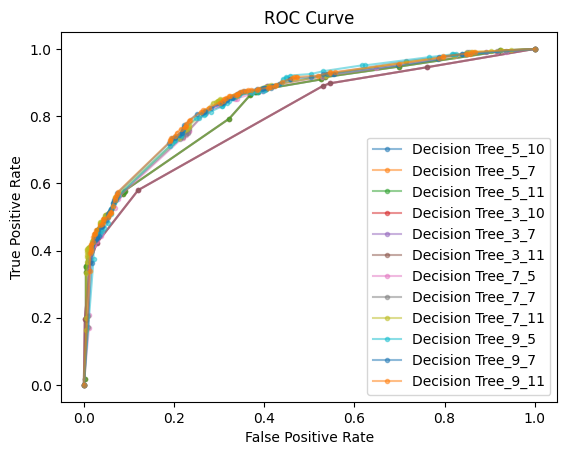

In [40]:
dtt_5_10=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=10)
fit_model(dtt_5_10, "Decision Tree_5_10")

dtt_5_7=DecisionTreeClassifier(max_depth=5,min_samples_leaf=7,min_samples_split=7)
fit_model(dtt_5_7, "Decision Tree_5_7")
dtt_5_11=DecisionTreeClassifier(max_depth=5,min_samples_leaf=11,min_samples_split=11)
fit_model(dtt_5_11, "Decision Tree_5_11")

dtt_3_10=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,min_samples_split=10)
fit_model   (dtt_3_10, "Decision Tree_3_10")
dtt_3_7=DecisionTreeClassifier(max_depth=3,min_samples_leaf=7,min_samples_split=7)
fit_model(dtt_3_7, "Decision Tree_3_7")
dtt_3_11=DecisionTreeClassifier(max_depth=3,min_samples_leaf=11,min_samples_split=11)
fit_model   (dtt_3_11, "Decision Tree_3_11")
dtt_7_5=DecisionTreeClassifier(max_depth=7,min_samples_leaf=5,min_samples_split=5)
fit_model(dtt_7_5, "Decision Tree_7_5")
dtt_7_7=DecisionTreeClassifier(max_depth=7,min_samples_leaf=7,min_samples_split=7)
fit_model(dtt_7_7, "Decision Tree_7_7")
dtt_7_11=DecisionTreeClassifier(max_depth=7,min_samples_leaf=11,min_samples_split=11)
fit_model(dtt_7_11, "Decision Tree_7_11")
dtt_9_5=DecisionTreeClassifier(max_depth=9,min_samples_leaf=5,min_samples_split=5)
fit_model(dtt_9_5, "Decision Tree_9_5")
dtt_9_7=DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=7)
fit_model(dtt_9_7, "Decision Tree_9_7")
dtt_9_11=DecisionTreeClassifier(max_depth=9,min_samples_leaf=11,min_samples_split=11)
fit_model(dtt_9_11, "Decision Tree_9_11")

KNN CLUSTERING

KNN_11  :  0.8519790454016296
KNN_13  :  0.8551672134617421
KNN_15  :  0.8560237855857762
KNN_17  :  0.8570179384061805
KNN_19  :  0.8575894274526404
KNN_21  :  0.8590121970578898
KNN_23  :  0.8602742353688221
KNN_25  :  0.8611076568949094
KNN_27  :  0.861514445973119
KNN_29  :  0.8626852047835749


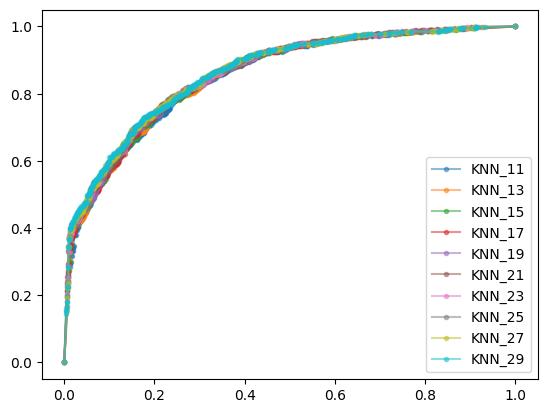

In [29]:
from sklearn.neighbors import KNeighborsClassifier


knn_11=KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_11, "KNN_11")
knn_13=KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_13, "KNN_13")
knn_15=KNeighborsClassifier(n_neighbors=15,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_15, "KNN_15")
knn_17=KNeighborsClassifier(n_neighbors=17,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_17, "KNN_17")
knn_19=KNeighborsClassifier(n_neighbors=19,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='euclidean')
fit_model(knn_19, "KNN_19")
knn_21=KNeighborsClassifier(n_neighbors=21,weights='distance',algorithm='auto',leaf_size=30,p=2,metric='euclidean')
fit_model(knn_21, "KNN_21")
knn_23=KNeighborsClassifier(n_neighbors=23,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_23, "KNN_23")
knn_25=KNeighborsClassifier(n_neighbors=25,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_25, "KNN_25")
knn_27=KNeighborsClassifier(n_neighbors=27,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_27, "KNN_27")
knn_29=KNeighborsClassifier(n_neighbors=29,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)
fit_model(knn_29, "KNN_29")
knn_31=KNeighborsClassifier(n_neighbors=31,weights='distance',algorithm='auto',leaf_size=30,metric='euclidean',p=2)

NAIVE BAYES

Naive Bayes  :  0.8373518361731399
Bernoulli Naive Bayes  :  0.774931209651815
Multinomial Naive Bayes  :  0.7267607683352737
Complement Naive Bayes  :  0.7267607683352737


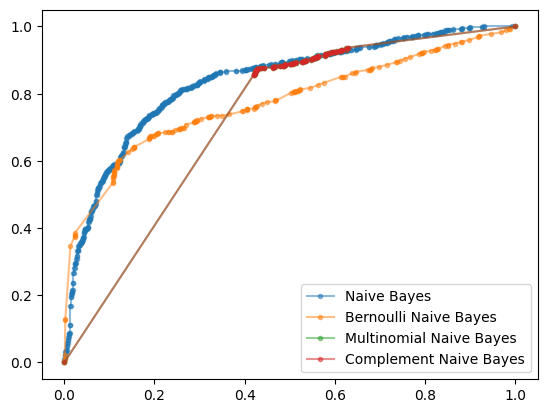

In [30]:
NB=GaussianNB()
fit_model(NB, "Naive Bayes")
BB=BernoulliNB()
fit_model(BB, "Bernoulli Naive Bayes")
MB=MultinomialNB()
fit_model(MB, "Multinomial Naive Bayes")
CB=ComplementNB()
fit_model(CB, "Complement Naive Bayes")

RANDOM FOREST

Random Forest_5_9  :  0.830310085723357
Random Forest_5_7  :  0.8041591702825696
Random Forest_5_11  :  0.7817394697851625
Random Forest_7_5  :  0.8282384379299397
Random Forest_7_7  :  0.7893619695205842
Random Forest_7_11  :  0.7835419091967404
Random Forest_9_5  :  0.8300091279500477
Random Forest_9_7  :  0.8295533918933221
Random Forest_9_11  :  0.7829565297915124


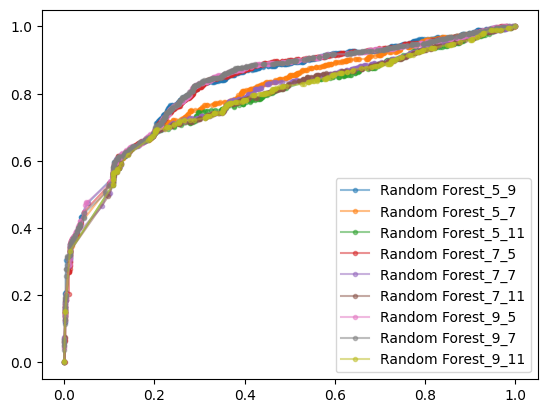

In [31]:
warnings.filterwarnings("ignore")

RF_100_5_9=RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=9, min_samples_split=10,n_jobs=-1,ccp_alpha=0.01)
fit_model(RF_100_5_9, "Random Forest_5_9")
RF_100_5_7=RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=7, min_samples_split=7,n_jobs=-1,ccp_alpha=0.02)
fit_model(RF_100_5_7, "Random Forest_5_7")
RF_100_5_11=RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=11, min_samples_split=11,n_jobs=-1,ccp_alpha=0.03)
fit_model(RF_100_5_11, "Random Forest_5_11")
RF_200_7_5=RandomForestClassifier(ccp_alpha=0.01, max_depth=7, min_samples_leaf=5,
                       min_samples_split=9, n_estimators=200, n_jobs=-1)
fit_model(RF_200_7_5, "Random Forest_7_5")
RF_200_7_7=RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=7, min_samples_split=7,n_jobs=-1,ccp_alpha=0.02)
fit_model(RF_200_7_7, "Random Forest_7_7")
RF_200_7_11=RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=11, min_samples_split=11,n_jobs=-1,ccp_alpha=0.03)
fit_model(RF_200_7_11, "Random Forest_7_11")
RF_300_9_5=RandomForestClassifier(n_estimators=300, max_depth=9, min_samples_leaf=5, min_samples_split=5,n_jobs=-1,ccp_alpha=0.01)
fit_model(RF_300_9_5, "Random Forest_9_5")
RF_300_9_7=RandomForestClassifier(ccp_alpha=0.01, max_depth=9, min_samples_leaf=7,
                       min_samples_split=5, n_estimators=300, n_jobs=-1)
fit_model(RF_300_9_7, "Random Forest_9_7")
RF_300_9_11=RandomForestClassifier(n_estimators=300, max_depth=9, min_samples_leaf=11, min_samples_split=11,n_jobs=-1,ccp_alpha=0.03)
fit_model(RF_300_9_11, "Random Forest_9_11")

LIGHT GRADIENT BOOSTING



[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: min_samples_split
LGBM 1  :  0.8858073605672558
LGBM 2  :  0.8795778653825802
LGBM 3  :  0.8574300190496349
LGBM 4  :  0.8844924066038734
LGBM 5  :  0.8799509207323526
LGBM 6  :  0.8556229495184675
LGBM 7  :  0.8593224150703778
LGBM 8  :  0.8820305058736374
LGBM 9  :  0.853491771616044
LGBM 10  :  0.8848568631601228
LGBM 11  :  0.8843296909725897
LGBM 12  :  0.8473780294211029
LGBM 13  :  0.8848442956926659
LGBM 14  :  0.8859125304265002
LGBM 15  :  0.8407457138321515
LGBM 16  :  0.8818386866335062
LGBM 17  :  0.8847814583553815
LGBM 18  :  0.8219520584188802
LGBM 19  :  0.8638228913112499
LGBM 20  :  0.8700894274526405


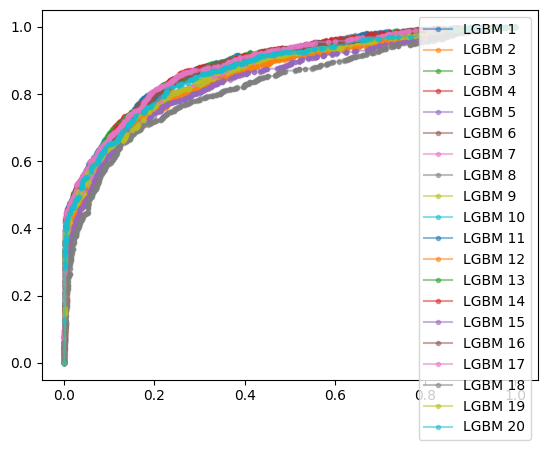

In [32]:
l1=LGBMClassifier(max_depth=5,num_leaves=15, min_samples_leaf=9,min_samples_split=5,colsample_bytree=0.8, n_estimators=300, n_jobs=-1,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l1, "LGBM 1")
l2=LGBMClassifier(max_depth=7,num_leaves=63,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=300, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l2, "LGBM 2")
l3=LGBMClassifier(max_depth=9,num_leaves=31,min_child_samples=11,min_child_weight=3,colsample_bytree=0.04, n_estimators=300, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l3, "LGBM 3")
l4=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.8, n_estimators=250, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l4, "LGBM 4")
l5=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=250, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l5, "LGBM 5")
l6=LGBMClassifier(max_depth=9,min_child_samples=11,min_child_weight=3,colsample_bytree=0.04, n_estimators=250, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l6, "LGBM 6")
l7=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.01, n_estimators=200, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l7, "LGBM 7")
l8=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=200, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l8, "LGBM 8")
l9=LGBMClassifier(max_depth=9,min_child_samples=11,min_child_weight=3,colsample_bytree=0.03, n_estimators=200, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l9, "LGBM 9")
l10=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.8, n_estimators=150, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l10, "LGBM 10")
l11=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=150, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l11, "LGBM 11")
l12=LGBMClassifier(max_depth=9,min_child_samples=11,min_child_weight=3,colsample_bytree=0.03, n_estimators=150, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l12, "LGBM 12")
l13=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.8, n_estimators=100, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l13, "LGBM 13")
l14=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=100, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l14, "LGBM 14")
l15=LGBMClassifier(max_depth=9,min_child_samples=11,min_child_weight=3,colsample_bytree=0.03, n_estimators=100, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l15, "LGBM 15")
l16=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.8, n_estimators=50, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l16, "LGBM 16")
l17=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=50, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l17, "LGBM 17")
l18=LGBMClassifier(max_depth=9,min_child_samples=11,min_child_weight=3,colsample_bytree=0.03, n_estimators=50, n_jobs=-1,subsample=0.01,reg_alpha=0.2,reg_lambda=0.2,verbose=-1)
fit_model(l18, "LGBM 18")
l19=LGBMClassifier(max_depth=5,min_child_samples=9,min_child_weight=4,colsample_bytree=0.8, n_estimators=10, n_jobs=-1,subsample=0.8,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l19, "LGBM 19")
l20=LGBMClassifier(max_depth=7,min_child_samples=7,min_child_weight=5,colsample_bytree=0.8, n_estimators=10, n_jobs=-1,subsample=0.02,reg_alpha=0.1,reg_lambda=0.1,verbose=-1)
fit_model(l20, "LGBM 20")



[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: min_samples_split
Voting Classifier  :  0.8811567361625567


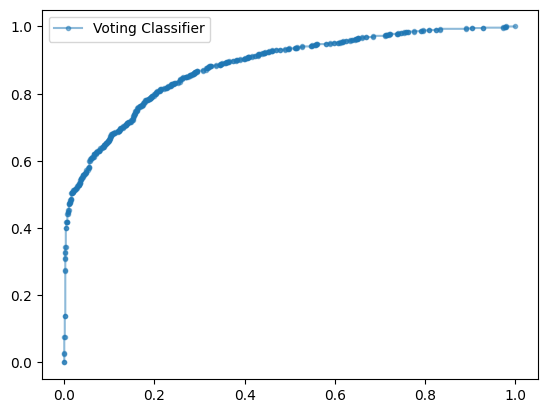

In [38]:
voting=VotingClassifier(estimators=[('l1',l1),('l2',l2),('l3',l3),('l4',l4),('l5',l5),('l6',l6),('l7',l7),('l8',l8),('l9',l9),('l10',l10),('l11',l11),('l12',l12),('l13',l13),('l14',l14),('l15',l15),('l16',l16),('l17',l17),('l18',l18),('l19',l19),('l20',l20)],voting='soft')
fit_model(voting, "Voting Classifier")
